In [1]:
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import graphviz
import dtale
import phik
from phik import resources, report
from numpy import quantile, where, random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2 as chis2
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import (Normalizer,MinMaxScaler,RobustScaler,StandardScaler,
                                   OneHotEncoder,OrdinalEncoder,PowerTransformer,QuantileTransformer)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")
import logging
from sklearn.cluster import KMeans
logging.getLogger('matplotlib').setLevel(logging.ERROR)

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

import datetime as dt
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

In C:\Users\xavil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\xavil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\xavil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\xavil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\xavil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('order_products.csv', usecols =['order_id','product_id'])
df.head()

,order_id,product_id
0,10,24
1,10,83
2,10,16
3,10,24
4,10,83


In [3]:
products = pd.read_csv('products.csv')
products.head()

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation


In [4]:
#merge product labels
df = pd.merge (df, products, how ='left', on= 'product_id').\
              drop(["product_id","department_id"], axis =1)
df.head()

,order_id,product_name
0,10,fresh fruits
1,10,fresh vegetables
2,10,fresh herbs
3,10,fresh fruits
4,10,fresh vegetables


In [5]:
#get modes and unique values
df.astype(object).describe()

,order_id,product_name
count,2019501,2019501
unique,200000,134
top,790903,fresh fruits
freq,137,226039


In [6]:
#check product frequencies
df['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [7]:
#Pivot the data - lines as orders and products as columns
pt = pd.pivot_table(df, index = 'order_id', columns = 'product_name',
                   aggfunc = lambda x: 1 if len(x) >0 else 0).fillna(0)
pt.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Now we get the vectors pivot table. Which products were bought.
#now we can do analysis on association rules.
#Since we have just zeros and ones, we can sum them and understand how many times each were bought. In our many orders this product was included.

In [9]:
#Check in how many orders was product yogurt sold.
pt['yogurt'].sum()

52735.0

In [10]:
#apply the Apriori algorithms to get frequent itemsets.
#Rules supported in at least 5% of the transactions.

frequent_itemsets = apriori(pt, min_support = 0.05, use_colnames = True)
frequent_itemsets.head(10)

,support,itemsets
0,0.076635,(baking ingredients)
1,0.163865,(bread)
2,0.067765,(breakfast bakery)
3,0.074330,(butter)
4,0.069305,(candy chocolate)
5,0.071890,(canned jarred vegetables)
6,0.069705,(canned meals beans)
7,0.092560,(cereal)
8,0.169435,(chips pretzels)
9,0.055650,(coffee)


In [11]:
#Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.50)
rulesConfidence.sort_values(by='confidence',ascending = False, inplace = True)
rulesConfidence.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(fresh herbs, fresh fruits)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
124,"(packaged vegetables fruits, yogurt, fresh veg...",(fresh fruits),0.087995,0.555995,0.076240,0.866413,1.558311,0.027315,3.323711
114,"(packaged vegetables fruits, milk, fresh veget...",(fresh fruits),0.073075,0.555995,0.062535,0.855765,1.539159,0.021906,3.078336
34,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205
119,"(packaged vegetables fruits, packaged cheese, ...",(fresh fruits),0.081970,0.555995,0.068325,0.833537,1.499180,0.022750,2.667284


In [12]:
#Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric = 'lift', min_threshold =1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace = True)
rulesLift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317560,0.093005,0.061815,0.194656,2.092964,0.032280,1.126221
30,(fresh herbs),"(fresh fruits, fresh vegetables)",0.093005,0.317560,0.061815,0.664642,2.092964,0.032280,2.034958
31,(fresh vegetables),"(fresh herbs, fresh fruits)",0.444360,0.070135,0.061815,0.139110,1.983463,0.030650,1.080121
28,"(fresh herbs, fresh fruits)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
132,"(yogurt, fresh vegetables)","(packaged vegetables fruits, fresh fruits)",0.144660,0.269870,0.076240,0.527029,1.952899,0.037201,1.543710


In [13]:
#EXPLORING FREQUENT ITEMSETS

In [14]:
#Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

#Length = 2 and Support >= 0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
75,0.317560,"(fresh fruits, fresh vegetables)",2
85,0.269870,"(packaged vegetables fruits, fresh fruits)",2
100,0.234555,"(packaged vegetables fruits, fresh vegetables)",2


In [15]:
# fresh fruits and yogurt
frequent_itemsets[ frequent_itemsets['itemsets'] == {'yogurt', 'fresh fruits'}]

,support,itemsets,length
91,0.188225,"(yogurt, fresh fruits)",2


In [16]:
# packaged cheese
frequent_itemsets[ frequent_itemsets['itemsets'] == {'packaged cheese'}]

,support,itemsets,length
34,0.230995,(packaged cheese),1


In [17]:
# High Confidence and high Lift - complementary products
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(fresh herbs, fresh fruits)",(fresh vegetables),0.070135,0.44436,0.061815,0.881372,1.983463,0.030650,4.683872
34,(fresh herbs),(fresh vegetables),0.093005,0.44436,0.078655,0.845707,1.903203,0.037327,3.601205


In [18]:
# High Confidence rules where "fresh vegetables" and "fresh fruits" are in the LHS
rulesConfidence[rulesConfidence['antecedents']=={'fresh vegetables', 'fresh fruits'}]  # Because rules are a "frozenset" object, the order of items is not important

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
76,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.31756,0.365415,0.18658,0.587543,1.607877,0.070539,1.538546


In [19]:
# High Confidence rules where "packaged vegetables fruits" is in the RHS
rulesConfidence[['packaged vegetables fruits' in elem for elem in rulesConfidence['consequents']]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(packaged cheese, fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.104570,0.365415,0.068325,0.653390,1.788077,0.030114,1.830833
125,"(yogurt, fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.118420,0.365415,0.076240,0.643810,1.761860,0.032968,1.781592
115,"(milk, fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.099590,0.365415,0.062535,0.627924,1.718387,0.026143,1.705527
108,"(fresh vegetables, soy lactosefree)",(packaged vegetables fruits),0.094120,0.365415,0.057695,0.612994,1.677528,0.023302,1.639729
87,"(fresh fruits, frozen produce)",(packaged vegetables fruits),0.089235,0.365415,0.054415,0.609794,1.668772,0.021807,1.626284
110,"(yogurt, fresh vegetables)",(packaged vegetables fruits),0.144660,0.365415,0.087995,0.608288,1.664651,0.035134,1.620031
105,"(packaged cheese, fresh vegetables)",(packaged vegetables fruits),0.135850,0.365415,0.081970,0.603386,1.651235,0.032328,1.600007
63,"(eggs, fresh vegetables)",(packaged vegetables fruits),0.084310,0.365415,0.050675,0.601056,1.644858,0.019867,1.590660
53,"(bread, fresh vegetables)",(packaged vegetables fruits),0.091590,0.365415,0.053835,0.587783,1.608534,0.020367,1.539442
76,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.317560,0.365415,0.186580,0.587543,1.607877,0.070539,1.538546


In [20]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,(water seltzer sparkling water),(fresh vegetables),0.193005,0.444360,0.083355,0.431880,0.971915,-0.002409,0.978033
111,(fresh vegetables),(water seltzer sparkling water),0.444360,0.193005,0.083355,0.187584,0.971915,-0.002409,0.993328
232,"(fresh fruits, fresh vegetables)",(water seltzer sparkling water),0.317560,0.193005,0.063235,0.199128,1.031723,0.001944,1.007645
233,(water seltzer sparkling water),"(fresh fruits, fresh vegetables)",0.193005,0.317560,0.063235,0.327634,1.031723,0.001944,1.014983
82,(water seltzer sparkling water),(fresh fruits),0.193005,0.555995,0.111045,0.575348,1.034807,0.003735,1.045573
83,(fresh fruits),(water seltzer sparkling water),0.555995,0.193005,0.111045,0.199723,1.034807,0.003735,1.008395
133,(water seltzer sparkling water),(packaged vegetables fruits),0.193005,0.365415,0.073715,0.381933,1.045204,0.003188,1.026725
132,(packaged vegetables fruits),(water seltzer sparkling water),0.365415,0.193005,0.073715,0.201730,1.045204,0.003188,1.010929
58,(ice cream ice),(fresh fruits),0.110510,0.555995,0.064485,0.583522,1.049509,0.003042,1.066094
59,(fresh fruits),(ice cream ice),0.555995,0.110510,0.064485,0.115981,1.049509,0.003042,1.006189


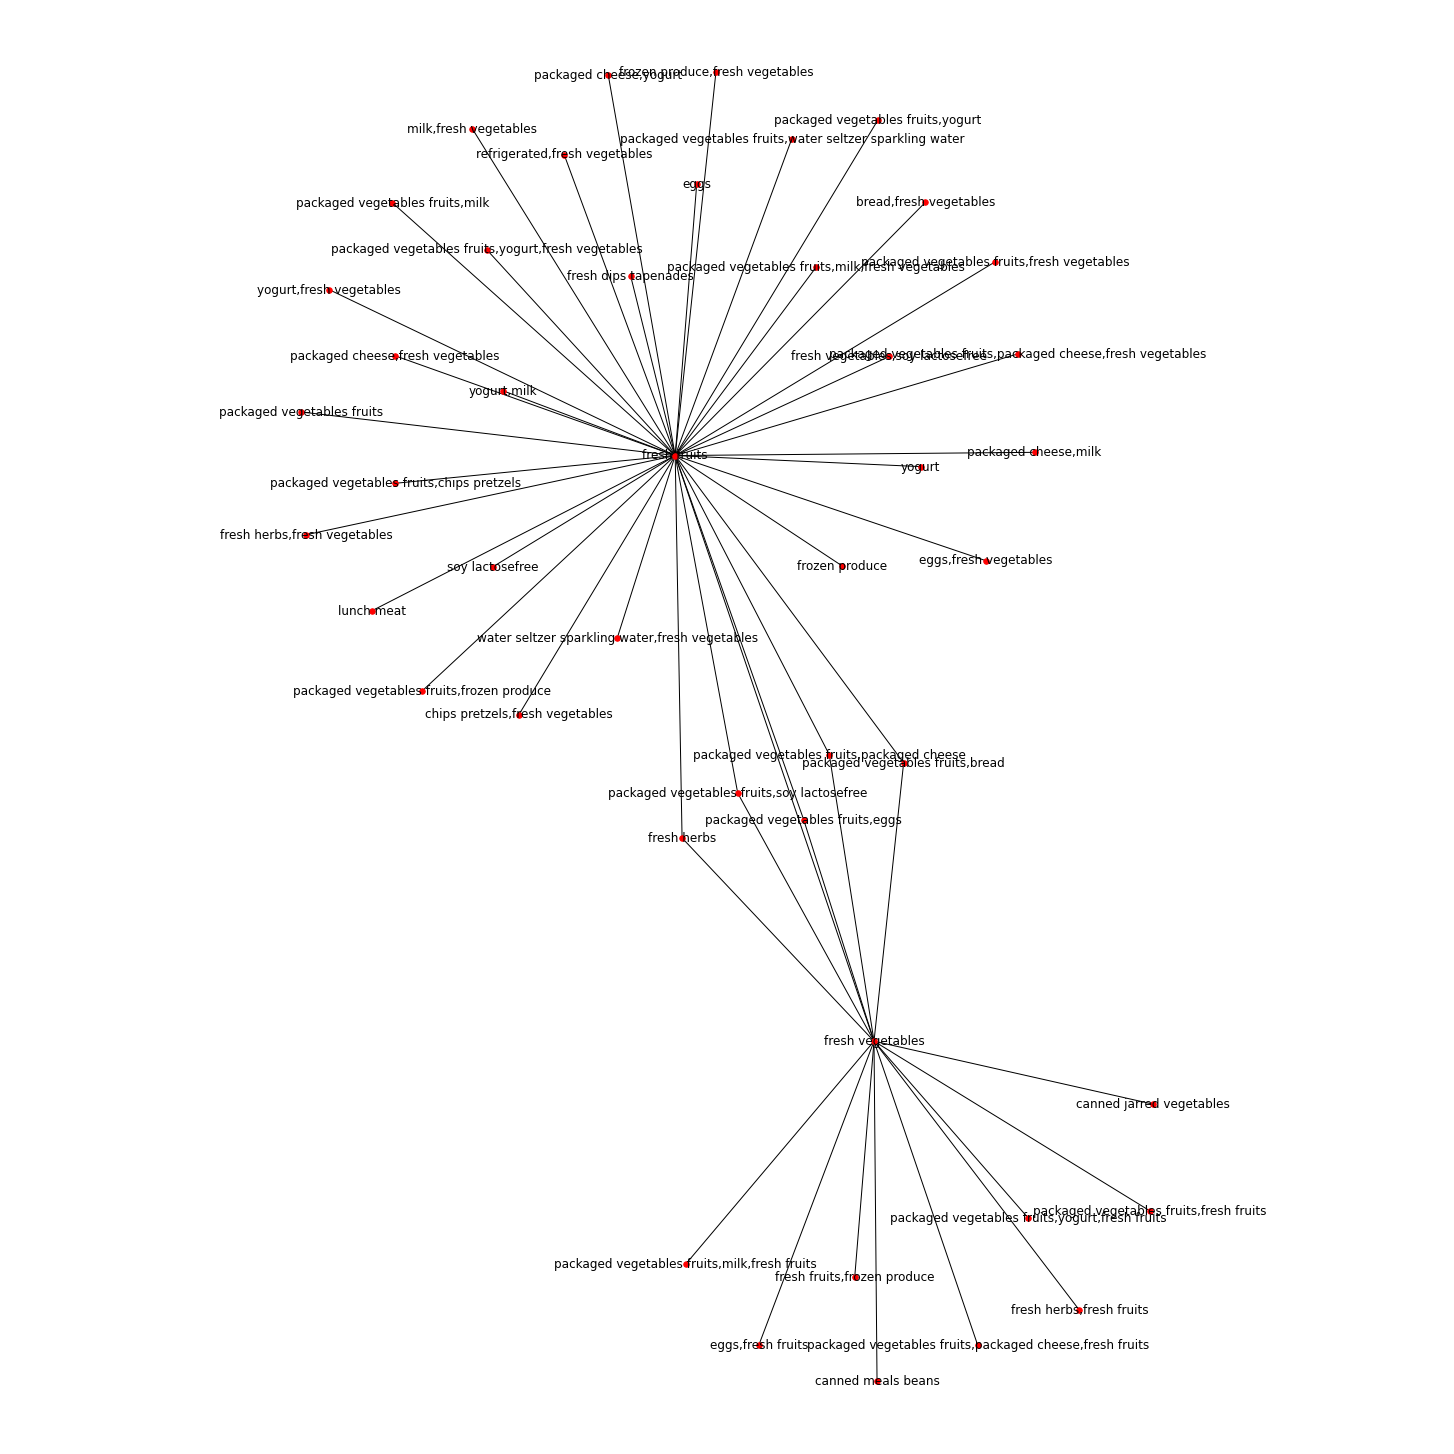

In [21]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')
# TRY TO PLOT THE DIRECTION OF SOURCE -> TARGET

In [26]:
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
order_products_prior_df = pd.read_csv("order_products.csv")
departments_df = pd.read_csv("departments.csv")


In [27]:
orders_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0


In [28]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0
3,10,24,4,1
4,10,83,5,1


In [29]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'eval_set'

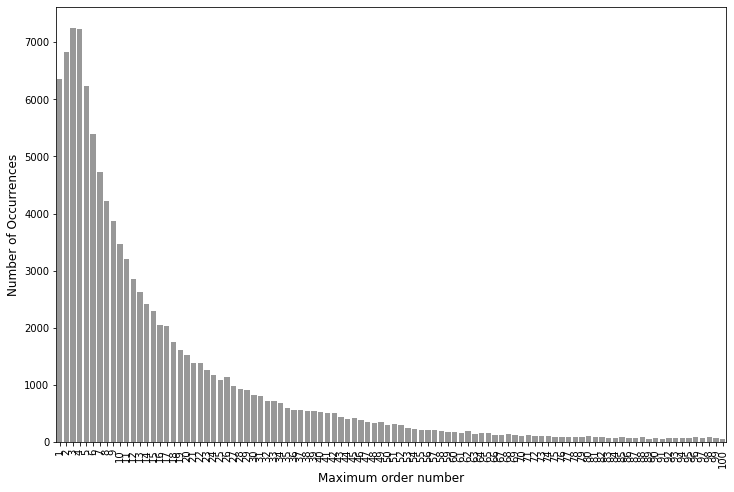

In [30]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[7])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

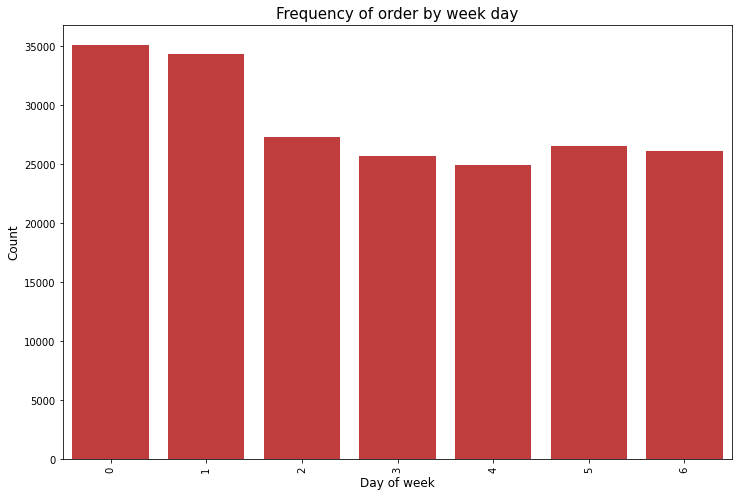

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

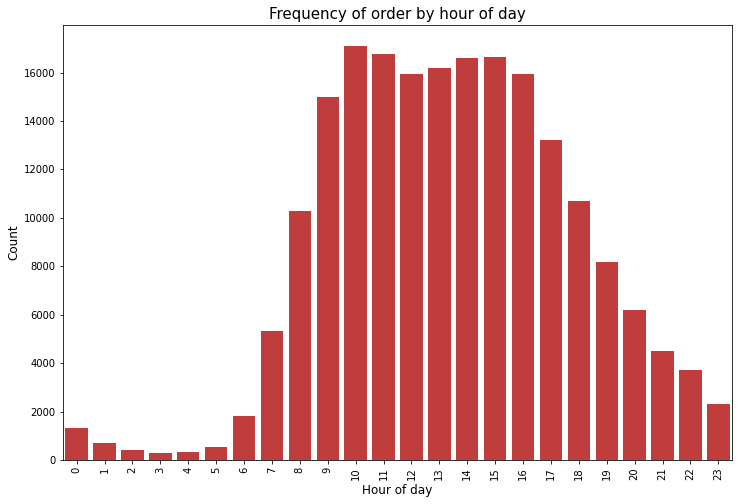

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()


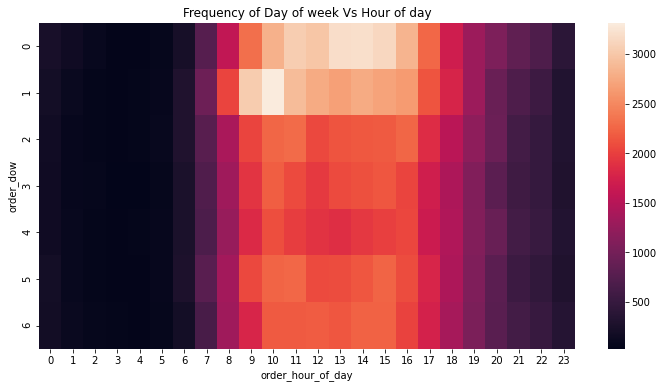

In [33]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

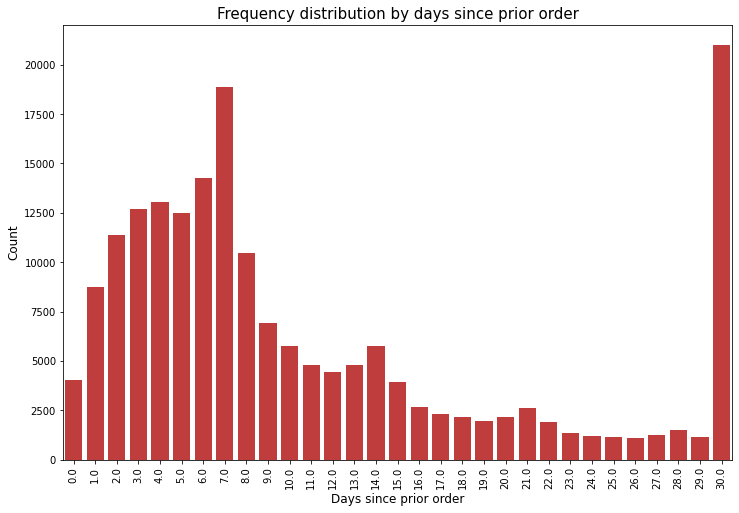

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [35]:
# percentage of re-orders in prior set 
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5897427136703571

In [36]:
#On an average, about 59% of the products in an order are re-ordered products.
#Now that we have seen 59% of the products are re-ordered, there will also be situations when none of 
#the products are re-ordered. Let us check that now.

In [37]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.88172
0    0.11828
Name: reordered, dtype: float64

In [38]:
#About 12% of the orders in prior set has no re-ordered items

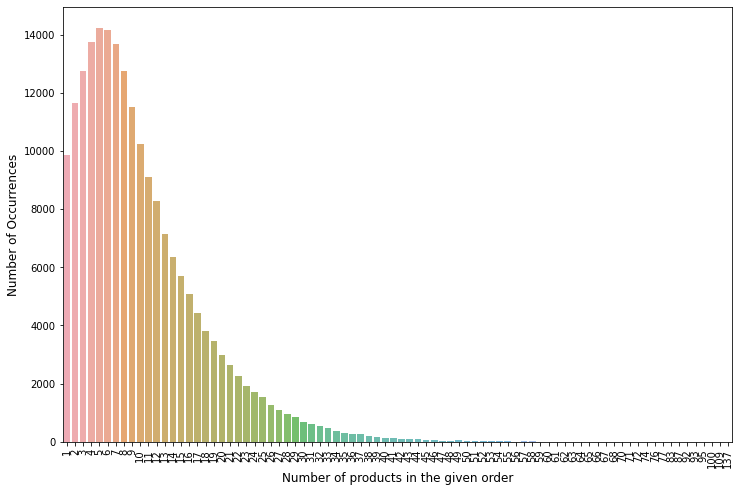

In [39]:
#see the number of products bought in each order.

grouped_df = order_products_prior_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
#A right tailed distribution with the maximum value at 5.0
#Before we explore the product details, let us look at the other three files as well.

In [41]:
products_df.head()

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation


In [42]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [43]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
#order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name
0,10,24,1,1,4,fresh fruits
1,10,83,2,1,4,fresh vegetables
2,10,16,3,0,4,fresh herbs
3,10,24,4,1,4,fresh fruits
4,10,83,5,1,4,fresh vegetables


In [44]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,fresh fruits,226039
1,fresh vegetables,212611
2,packaged vegetables fruits,109596
3,yogurt,90751
4,packaged cheese,61502
5,milk,55150
6,water seltzer sparkling water,52564
7,chips pretzels,45306
8,soy lactosefree,39389
9,bread,36381


In [45]:
#Most of them are organic products. Also majority of them are fruits.

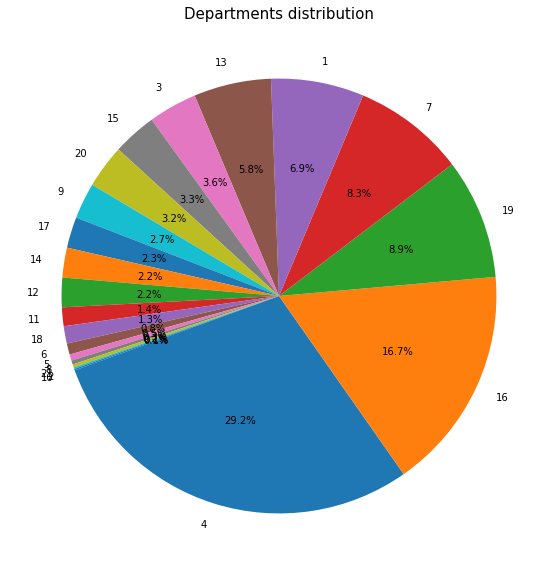

In [46]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department_id'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [47]:
#Produce is the largest department. Now let us check the reordered percentage of each department.

In [48]:
#Department wise reorder ratio:

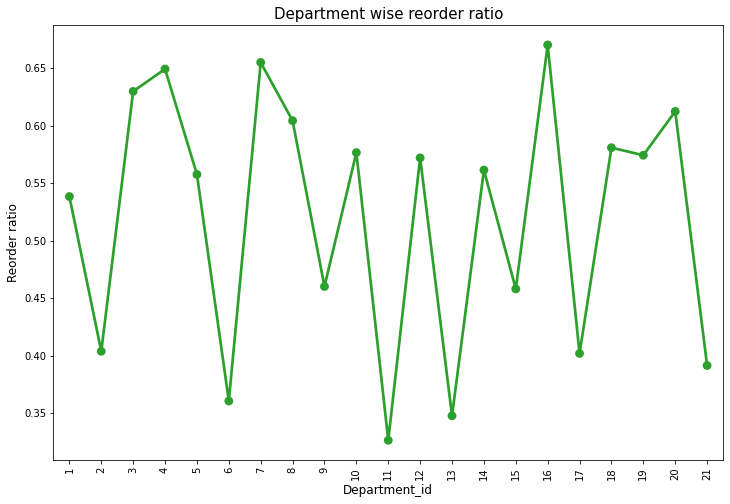

In [49]:
grouped_df = order_products_prior_df.groupby(["department_id"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department_id'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department_id', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
#Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

In [51]:
#Add to Cart - Reorder ratio:
#Let us now explore the relationship between how order of adding the product to the cart 
#affects the reorder ratio.

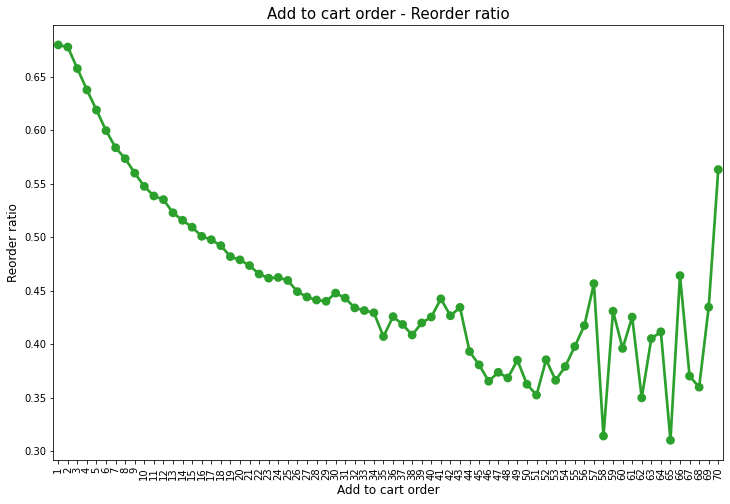

In [52]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
#Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. 
#This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

In [54]:
#Reorder ratio by Time based variables:

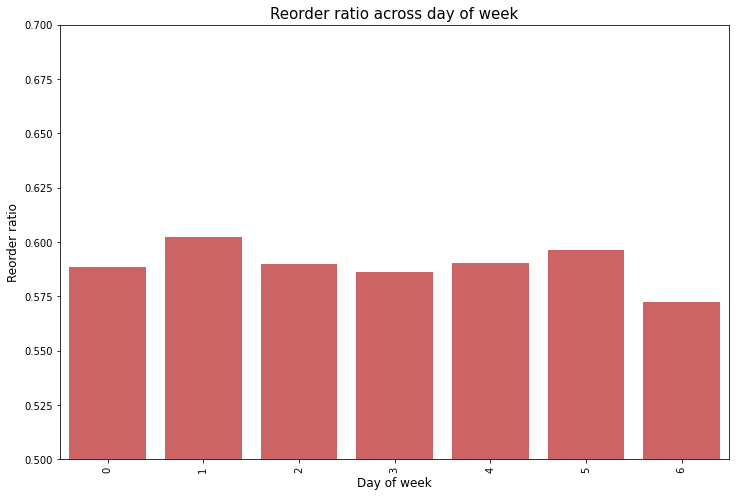

In [55]:
order_products_prior_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
grouped_df = order_products_prior_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

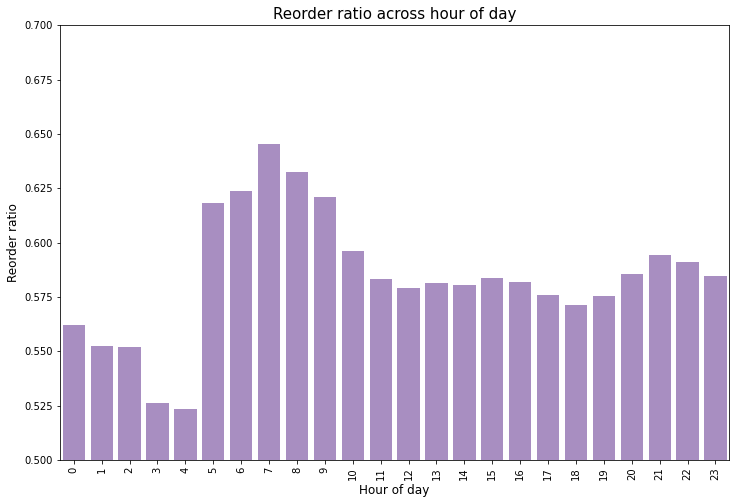

In [56]:
grouped_df = order_products_prior_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

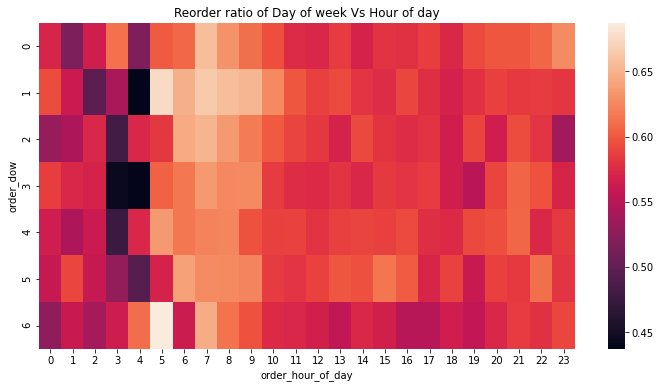

In [57]:
grouped_df = order_products_prior_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()